## 在线性回归模型中使用梯度下降法

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(666)
# x是１００个 数组
x = 2 * np.random.random(size=100)
# 截距是４，theta是３ ， ｙ 也是１００个值的数组
y = x * 3. + 4. + np.random.normal(size=100)

In [3]:
X = x.reshape(-1, 1)

In [13]:
X[:20]

array([[1.40087424],
       [1.68837329],
       [1.35302867],
       [1.45571611],
       [1.90291591],
       [0.02540639],
       [0.8271754 ],
       [0.09762559],
       [0.19985712],
       [1.01613261],
       [0.40049508],
       [1.48830834],
       [0.38578401],
       [1.4016895 ],
       [0.58645621],
       [1.54895891],
       [0.01021768],
       [0.22571531],
       [0.22190734],
       [0.49533646]])

In [11]:
y[:20]

array([8.91412688, 8.89446981, 8.85921604, 9.04490343, 8.75831915,
       4.01914255, 6.84103696, 4.81582242, 3.68561238, 6.46344854,
       4.61756153, 8.45774339, 3.21438541, 7.98486624, 4.18885101,
       8.46060979, 4.29706975, 4.06803046, 3.58490782, 7.0558176 ])

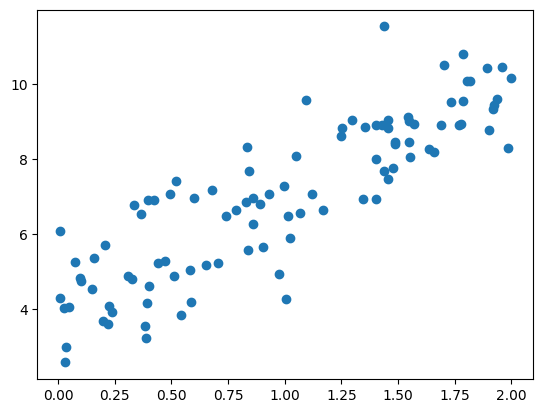

In [12]:
plt.scatter(x, y)
plt.show()

### 使用梯度下降法训练

In [14]:
# 求均方差，mes , theta 是一个数组，X_b 是一个矩阵 ，ｎ行ｉ列， n=len(X_b)
def J(theta, X_b, y):
    try:
        return np.sum((y - X_b.dot(theta))**2) / len(X_b)
    except:
        # 异常则给 浮点数中的最大值
        return float('inf')

In [15]:
# 求导 （也就是损失值)
def dJ(theta, X_b, y):
    res = np.empty(len(theta))
    # 第０行特殊
    res[0] = np.sum(X_b.dot(theta) - y)
    for i in range(1, len(theta)):
        #  X_b[:,i] 代表， 第几列
        res[i] = (X_b.dot(theta) - y).dot(X_b[:,i])
    return res * 2 / len(X_b)

In [16]:
# 求梯度下降中的 最优theta 
# initial_theta 初始化theta
# n_iters 迭代次数控制
# eta 学习率
# X_b 矩阵
# y 结果值
# epsilon 接受的误差值
def gradient_descent(X_b, y, initial_theta, eta, n_iters = 1e4, epsilon=1e-8):
    
    theta = initial_theta
    cur_iter = 0

    while cur_iter < n_iters:
        gradient = dJ(theta, X_b, y)
        last_theta = theta
        theta = theta - eta * gradient
        if(abs(J(theta, X_b, y) - J(last_theta, X_b, y)) < epsilon):
            break
            
        cur_iter += 1

    return theta

In [18]:
# 追加一列，截距处理 ＊ 固定值１ ，x0=1 
X_b = np.hstack([np.ones((len(x), 1)), x.reshape(-1,1)])
print(X_b.shape[1]) # 2列， 本身只有一列，现在多了一列 截距
#初始化 ｔｈｅｔａ 为２个０ 
initial_theta = np.zeros(X_b.shape[1])
print(initial_theta)
# 学习率
eta = 0.01
theta = gradient_descent(X_b, y, initial_theta, eta)

2
[0. 0.]


In [19]:
theta
# 4代表截距， ３代表 theta,这里只有一列

array([4.02145786, 3.00706277])

### 封装我们的线性回归算法

In [20]:
from playML.LinearRegression import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit_gd(X, y)

LinearRegression()

In [21]:
lin_reg.coef_

array([3.00706277])

In [22]:
lin_reg.intercept_

np.float64(4.021457858204859)